<a name="top"><h1>1. EDA</h1> </a>

<strong>Práctica Final : TOSCOS </strong><br />
<strong>Técnicas de Predicción: Series temporales</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong>

<p>&nbsp;</p>

<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

## Estructura

[1. Introducción](#introduccion) 

[2. Importación de librerias](#importacion)

[3. Análisis de las variables](#analisis)

[4. Representación gráfica de las series temporales](#grafica)

   - Gráficos de las ventas diarias de las 10 tiendas
   - Gráficos de las ventas diarias de las 3 zonas 
   - Gráficos de las ventas totales

<hr style="border:1px solid gray">

## <a name="introduccion"> 1. Introducción </a>

Para la realización de esta práctica final disponemos del dataset `datos.csv`,en el encontramos información sobre el nº de ventas que realizan las diferentes tiendas de la compañía TOSCOS, clasificadas pro zona y tipo de tienda. Aparte encontramos información relativa acerca de si durante ese día habia promociones, era festivo nacional o en centros educativos y el nº de clientes por día. En este documento analizaremos de cerca las variables y representaremos graficamente por tiendas y zonas el nº de ventas.

## <a name="importacion"> 2. Importación de librerias y carga de datos <a>

In [1]:
# Import basic libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings.

import warnings
warnings.filterwarnings('ignore')


Cargamos los datos:

In [2]:
# Load the data.

data = pd.read_csv('../data/datos.csv')

## <a name="analisis"> 3. Análisis de las variables </a>

En primer lugar comprobamos la estructura del dataset:

In [4]:
# Print a phrase with the number of rows and columns.

print('The dataset has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

# Sort the data by date.

data = data.sort_values(by='Date', ascending=True)

# Display the first 5 rows.

data.head()

The dataset has 9236 rows and 9 columns.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
9235,T3d,2,2013-01-01,0,0,0,0,a,1
9226,T1a,2,2013-01-01,0,0,0,0,a,1
9227,T1b,2,2013-01-01,0,0,0,0,a,1
9228,T1c,2,2013-01-01,0,0,0,0,a,1
9229,T2a,2,2013-01-01,0,0,0,0,a,1


Observamos las diferentes variables su formato:

In [5]:
# Display the information of the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236 entries, 0 to 9235
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          9236 non-null   object
 1   DayOfWeek      9236 non-null   int64 
 2   Date           9236 non-null   object
 3   Sales          9236 non-null   int64 
 4   Customers      9236 non-null   int64 
 5   Open           9236 non-null   int64 
 6   Promo          9236 non-null   int64 
 7   StateHoliday   9236 non-null   object
 8   SchoolHoliday  9236 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 649.5+ KB


Encontramos que la mayoría de los valores son de tipo entero excepto, `Store`, `Date` y `StateHoliday` que son de tipo _object_.

### 2.1. Valores distintos

Dado que vemos a simple vista que algunas variables pueden ser categóricas, observaremos el nº de valores distintos que tiene cada variable.

In [5]:
# Show distinct values for each column except for 'Date'

for col in data.columns:
    if col != 'Date':
        print(col, data[col].unique())


Store ['T3d' 'T1a' 'T1b' 'T1c' 'T2a' 'T3c' 'T2c' 'T3a' 'T3b' 'T2b']
DayOfWeek [2 3 4 5 6 7 1]
Sales [    0  6072  6676 ... 10483 12602 11075]
Customers [   0  697 1134 ... 1571 1436 1158]
Open [0 1]
Promo [0 1]
StateHoliday ['a' '0' 'b' 'c']
SchoolHoliday [1 0]


Observamos lo siguiente:

- Tal y como decía el enunciado existen diferentes tiendas según la zona.
- Los días de la semana están comprendidos de lunes a domingo.
- El nº de ventas y clientes varía en función de los días.
- Las variables `Open`, `Promo` indican con valor 0 si esán cerradas o no hay promoción respectivamente, meintras que el 1 indica que está abierto o que hay promoción.
- Dentro de los tipos de vacaciones encontramos, los días festivos de los centros educativos, 0 cuando no es festivo y uno cuando si. Sin emabrgo en la variable `StateHoliday` encontramos 3 tipos de festivos diferentes: a,b,c.

### 2.2. Valores nulos

Es importante conocer si nuestra serie temporal contiene valores nulos, por lo que lo comprobamos:

In [7]:
# Show the number of null values for each column

data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

En este caso todas las variables están completas

### 2.3. Comprensión de los datos

Una vez analizados los formatos y distintos valores vamos a estudiar el comportamiento de las tiendas de TOSCOS.

#### ¿Qué días de la semana suelen cerrar las tiendas?

<AxesSubplot: xlabel='DayOfWeek'>

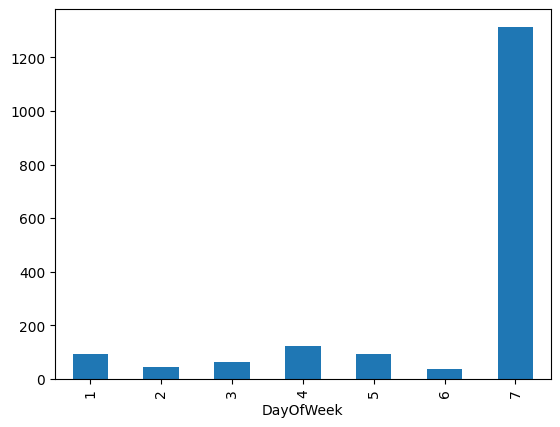

In [6]:
# Plot a bar chart using data showing the sum of rows where are Open=0 in order to day of the week.

data[data.Open == 0].groupby('DayOfWeek').size().plot(kind='bar')


Observamos como destaca el domingo, como día en el que se suelen estar cerradas las tiendas.

#### ¿Suelen los días festivos estar las tiendas cerradas?

Dado que tenemos festivos diferentes, comenzamos principalmente con los festivos del estado.

<AxesSubplot: xlabel='StateHoliday'>

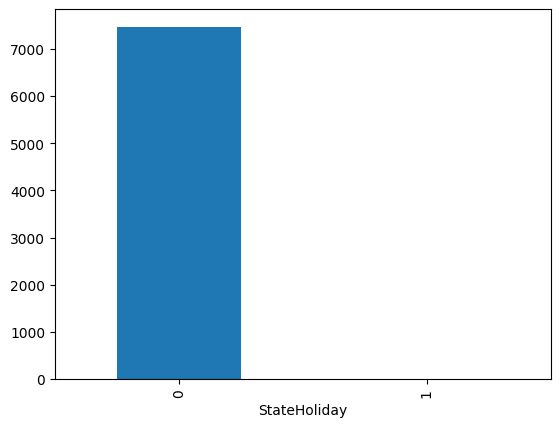

In [9]:
# Replace the state holiday values with 0 and 1.

data['StateHoliday'] = data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})

# Plot a bar chart checking  if the stores are closerd during the State Holidays.

data[data.Open == 1].groupby('StateHoliday').size().plot(kind='bar')

Comprobamos que practicamente ninguna tienda suele estar abiertas durante los festivos del estado, sin embargo, ¿Qué ocurre en los días festivos de los centros educativos?

<AxesSubplot: xlabel='SchoolHoliday'>

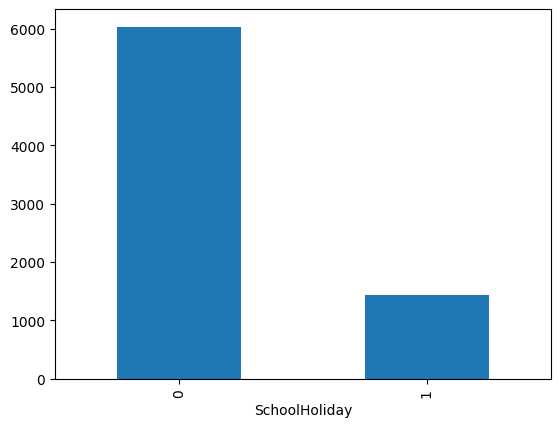

In [10]:
# Plot a bar chart checking  if the stores are closed during the School Holidays.

data[data.Open == 1].groupby('SchoolHoliday').size().plot(kind='bar')

Al diferencia de los días festivos estatales, algunas tiendas suelen tender a estar abiertas durante los días festivos de los centros educativos.

#### ¿Cuántos días han estado las tiendas abiertas y han obtenido 0 ventas?

In [11]:
# Check the number of days that the stores were open with 0 sales.

data.query('Open == 1 & Sales == 0')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
3561,T1b,4,2014-07-24,0,0,1,0,0,1
3669,T1b,6,2014-07-12,0,0,1,0,0,0


Observamos como únicamente dos días una tienda estuvo abierta y obtuvo 0 ventas, aunque uno de los días era festivo en centros educativos, por lo que no es común no realizar ninguna venta cuando estan abiertos.

## <a name="grafica"> 4. Representación gráfica de las series temporales </a>

### 4.1. Gráficos de las ventas diarias de las 10 tiendas

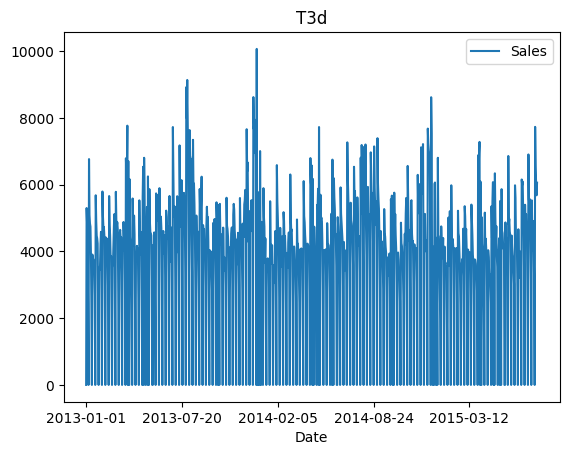

<Figure size 2000x2000 with 0 Axes>

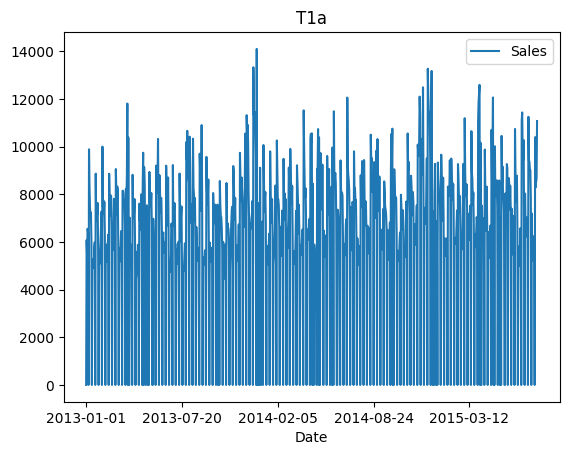

<Figure size 2000x2000 with 0 Axes>

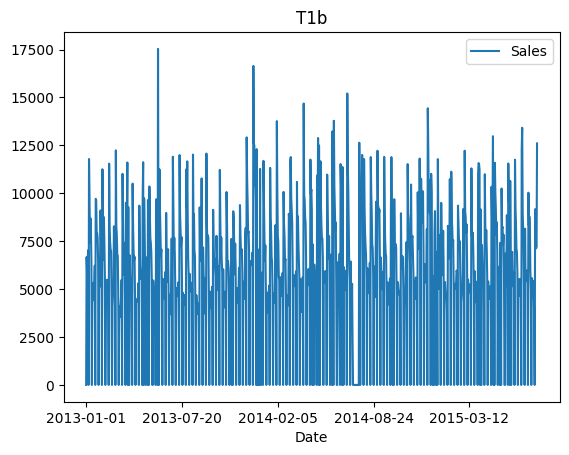

<Figure size 2000x2000 with 0 Axes>

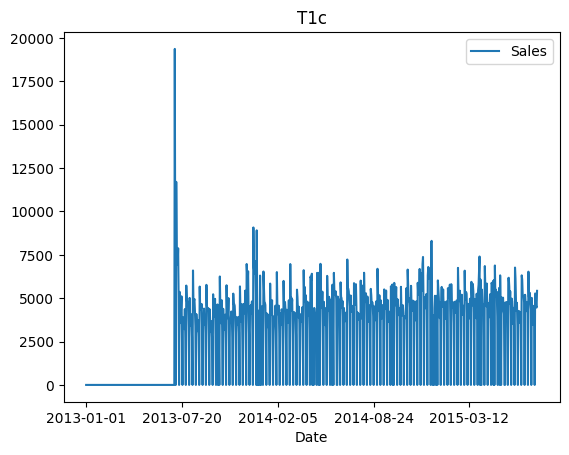

<Figure size 2000x2000 with 0 Axes>

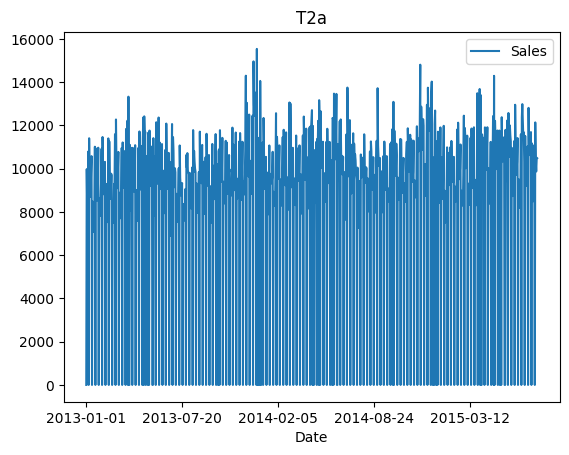

<Figure size 2000x2000 with 0 Axes>

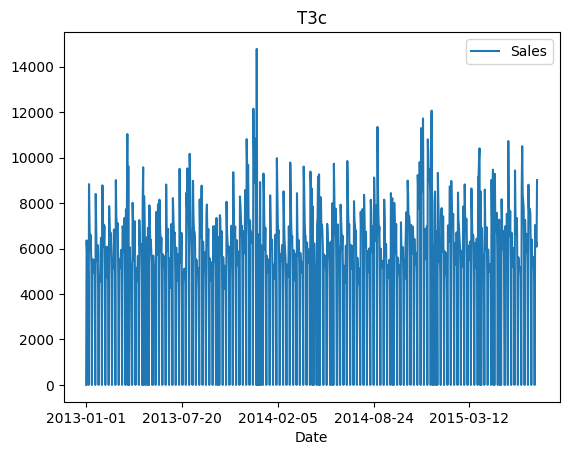

<Figure size 2000x2000 with 0 Axes>

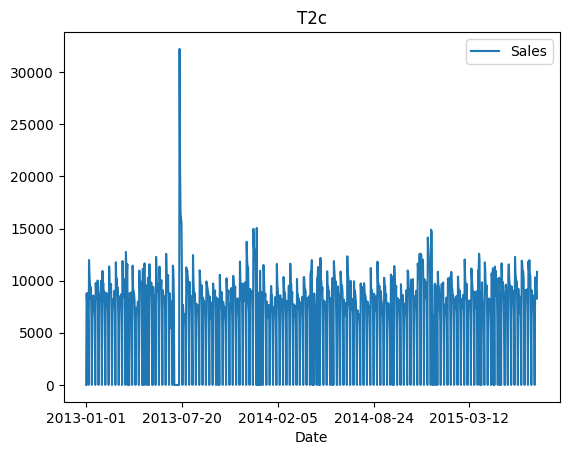

<Figure size 2000x2000 with 0 Axes>

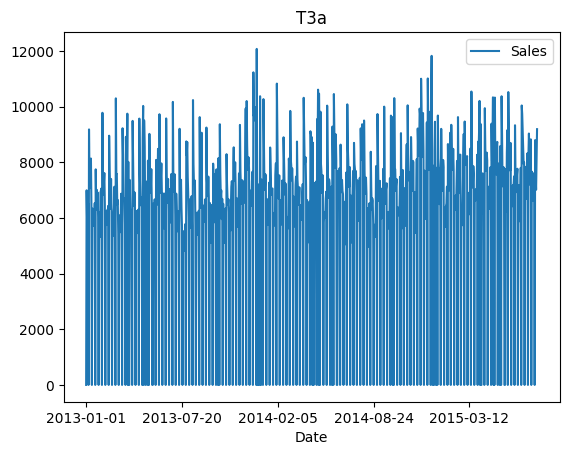

<Figure size 2000x2000 with 0 Axes>

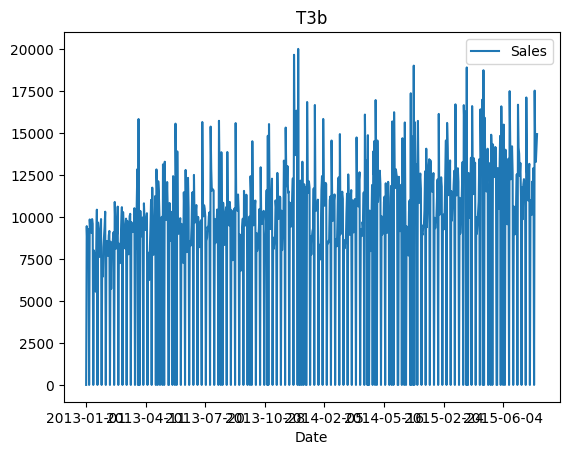

<Figure size 2000x2000 with 0 Axes>

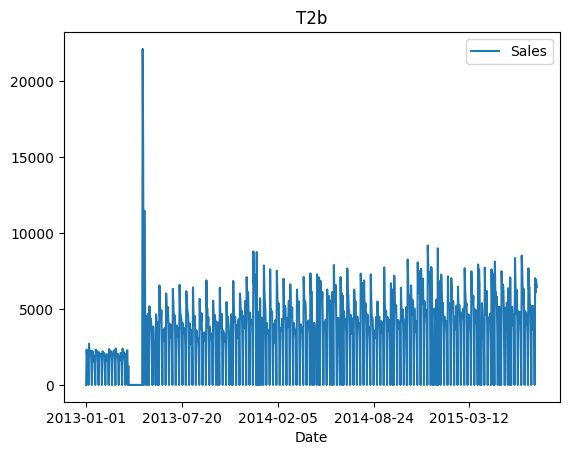

<Figure size 2000x2000 with 0 Axes>

In [7]:
# Plot series of each different store in order to the sales variable. One graph per store. X axe are dates and title of the graph the name of store. Plot 2 by row.


for store in data.Store.unique():
    data[data.Store == store].plot(x='Date', y='Sales', title=store)

    # Plot size of the graph.

    plt.figure(figsize=(20, 20))


plt.show()

Una vez mostradas las gráficas diarias de cada tienda, podemos destacar algún comportamiento extraño en alguna tienda como:

   - T1C. A partir de junio de 2013 aproximadamente la tienda permaneció cerrada.
   - T3B. Se nota un aumento gradual del nº de ventas a lo largo del tiempo.
   - T2B. Durante unos periodo en 2013, la tienda permaneció cerrada, sin embargo aumnetó el nº de ventas progresivamente.
   - A comienzo de mayo de 2013 algunas tiendas tuvieron ventas por encima de lo normal, como T2b, T2c, T1c, T1b.


### 4.2. Gráficos de las ventas diarias de las 3 zonas

Procedemos a agrupar las tiendas por zona y por días.

In [17]:
# From the column 'Store' create a new column 'StoreNumber' with the store number and a new column 'StoreType' with the type of store.

data['StoreZone'] = data['Store'].str[1]
data['Storetype'] = data['Store'].str[2]


# Create a new dataframe with the data of the store 1
data1 = data[data['StoreZone'] == '1']

# Create a new dataframe with the data of the store 2

data2 = data[data['StoreZone'] == '2']

# Create a new dataframe with the data of the store 3

data3 = data[data['StoreZone'] == '3']


#### 4.2.1. Zona 1

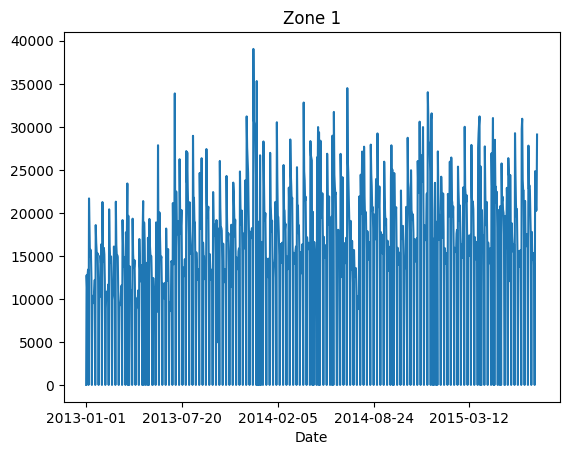

In [10]:
# Group data by date and plot the number of sales for each date.

data1.groupby('Date').Sales.sum().plot(title='Zone 1')



# Plot figure.

plt.show()

    

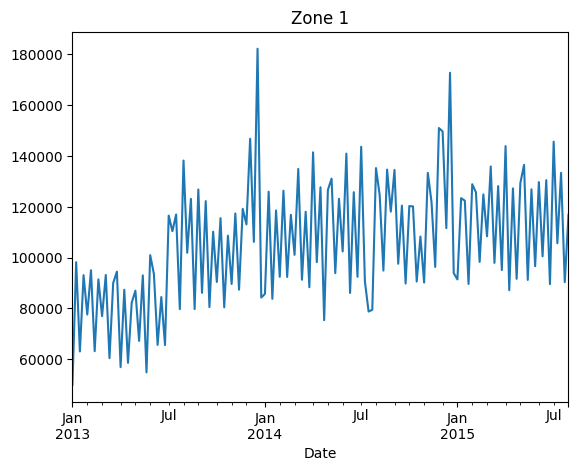

In [19]:
# Resameple data 1  weekly and plot the number of sales for each week.

data1.groupby('Date').Sales.sum().resample('W').sum().plot(title='Zone 1')

# Plot figure.

plt.show()



Durante esta serie de años, las ventas de la Zona 1 fueron aumentando progresivamente.

### 4.2.2. Zona 2

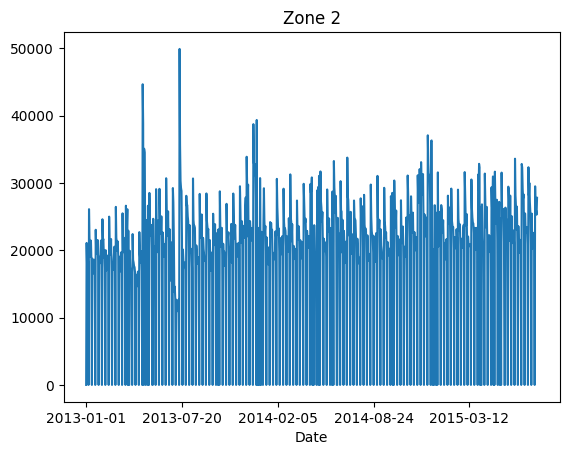

In [11]:
# Group data by date and plot the number of sales for each date.

data2.groupby('Date').Sales.sum().plot(title='Zone 2')


# Plot figure.

plt.show()


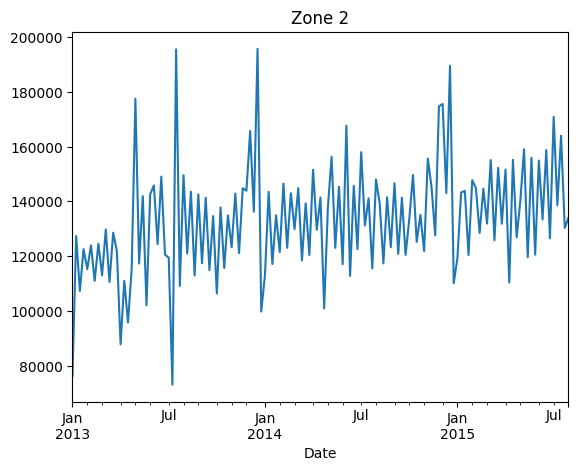

In [20]:
# Resameple data 1  weekly and plot the number of sales for each week.

data2.groupby('Date').Sales.sum().resample('W').sum().plot(title='Zone 2')

# Plot figure.

plt.show()



Durante estos años, la zona 2 se ha comportado de una forma practicamente lineal, aunque con un ligero aumento de ventas.

#### 4.2.3. Zona 3

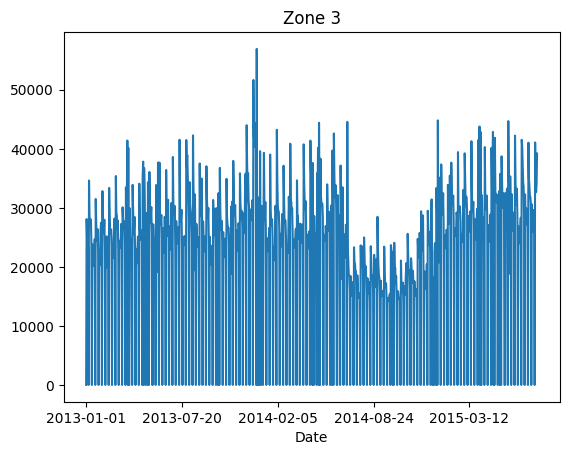

In [12]:
# Group data by date and plot the number of sales for each date.

data3.groupby('Date').Sales.sum().plot(title='Zone 3')


# Plot figure.

plt.show()


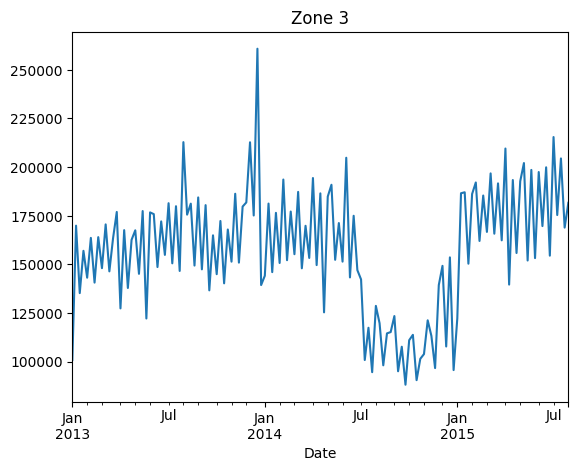

In [21]:
# Resameple data 1  weekly and plot the number of sales for each week.

data3.groupby('Date').Sales.sum().resample('W').sum().plot(title='Zone 3')

# Plot figure.

plt.show()



La zona 3 es la que mas destaca, dado que observamos como a partir de mediados de 2014 las ventas sufren un gran retroceso que logran ir remontando hasta agosto de 2015.

## 4.3. Gráficos de las ventas totales

En este apartado procederemos a visualizar las ventas totales daiarias y semanales.

### 4.3.1 Gráficos de las ventas diarias

In [13]:
# Sum up all the values of each store

daily = data.groupby('Date').sum()

# Resample data to daily.

data['Date'] = pd.to_datetime(data['Date'])

daily = data.resample('D', on='Date').sum()

<AxesSubplot: title={'center': 'Daily Sales'}, xlabel='Date'>

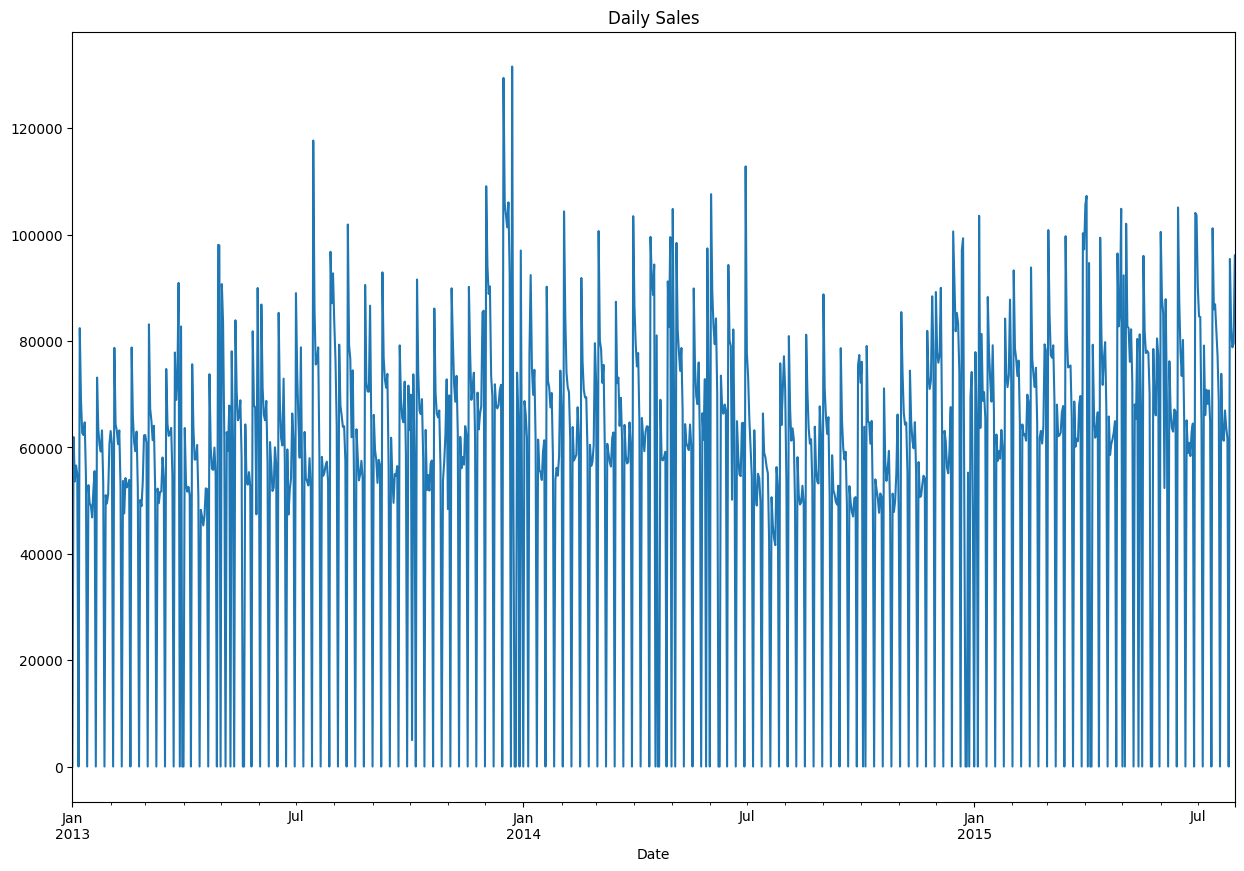

In [14]:
# Plot the daily sales.

daily['Sales'].plot(figsize=(15,10), title= 'Daily Sales')

En cuanto a las características de las ventas totales diarías se analizarán en `2.1_Predicciones_diarias`.

### 4.3.2 Gráficos de las ventas semanales

Agrupamos el nº de ventas por semana:

In [15]:
# Group by date and summ al the sales of the stores

grouped = data.groupby('Date').Sales.sum()

# Resample the data to weekly

grouped = grouped.resample('W').sum()

# Convert to dataframe grouped

grouped = pd.DataFrame(grouped)

Procedemos a representarlas graficamente:

<AxesSubplot: title={'center': 'Weekly sales of all the stores'}, xlabel='Date'>

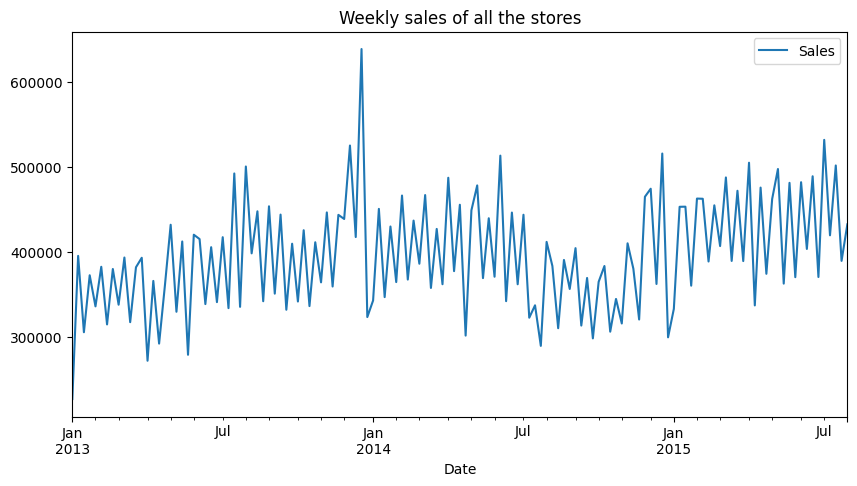

In [16]:
# Plot a graph with the sum of sales per week.

grouped.plot(title='Weekly sales of all the stores', figsize=(10,5))

En cuanto a las características de las ventas totales diarías se analizarán en `2.2_Predicciones_semanales`